# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dharma Pratama
- **Email:** m001d4ky1518@bangkit.academy
- **ID Dicoding:** dharma_bangkit

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan performa penyewaan sepeda di setiap bulan antara tahun 2011 dengan tahun 2012?
- Bagaimana perbandingan performa penyewaan sepeda secara casual dan registered di setiap musim?

## Import Semua Packages/Library yang Digunakan

Pada projek ini, terdapat beberapa packages/library yang akan digunakan:
- numpy akan digunakan untuk membantu proses pengecekan outlier dan juga komputasi lainnya
- pandas akan digunakan dalam proses Data Wrangling, mulai dari Gathering Data, Assessing Data, dan juga Cleaning Data
- matplotlib akan digunakan dalam proses visualisasi data yang relevan sesuai dengan pertanyaan bisnis
- seaborn akan digunakan sebagai library alternatif dalam proses visualisasi data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

Proses Data Warngling pertama-tama diawali dengan mealakukan pengumpulan (gathering) data. Hal ini dilakukan dengan memanfaatkan method .read_csv() yang telah disediakan oleh pandas. Di dalam method tersebut, kita hanya harus memasukkan nama file yang ingin kita baca dan juga delimiternya (karena ini csv, maka delimnya koma).

In [6]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
hour_df = pd.read_csv("data/hour.csv", delimiter=",")

### Assessing Data

Proses selanjutnya yaitu melakukan Asesmen terhadap data-data yang sudah kita baca sebelumnya. Proses pertama dilakukan dengan menggunakan method .info() untuk melihat jumlah Non-null dan juga tipe data. Selanjutnya untuk melihat statistik dari file csv tersebut, kita bisa memanfaatkan method .describe(). Selanjutnya kita mengecek jumlah duplicate, baik secara baris keseluruhan ataupun dalam kolom tanggal. Terakhir, kita melakukan pengecekan outlier terhadap kolom 'temp', 'atemp', 'hum', dan juga 'windspeed'.

In [7]:
#Assessing Data pada file day.csv

#Pengecekan Invalid Value
print(day_df.info())

#Melihat statistik dasar dari day_df
print(day_df.describe())

#Pengecekan Duplicate Value
print(f"\nJumlah duplikat: {day_df.duplicated().sum()}")

#Pengecekan Tanggal Duplikat
print(f"\nJumlah duplikat tanggal: {day_df['dteday'].duplicated().sum()}\n")

#Pengecekan kolom-kolom
check = ['temp', 'atemp', 'hum', 'windspeed']
for column in day_df.select_dtypes(include=np.number).columns:
    if column in check:
        Q1, Q3 = np.percentile(day_df[column], 25), np.percentile(day_df[column], 75)
        IQR = Q3 - Q1
        border = IQR * 1.5
        minimum, maximum = Q1 - border, Q3 + border
        outliers = day_df[(day_df[column] < minimum) | (day_df[column] > maximum)][column]
    
        print(f"Column: {column}")
        print(f"Outliers: {outliers}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

Lakukan proses yang sama terhadap file hour.csv

In [8]:
#Assessing Data pada file hour.csv

#Pengecekan Invalid Value
print(hour_df.info())

#Melihat statistik dasar dari hour_df
print(hour_df.describe())

#Pengecekan Duplicate Value
print(f"\nJumlah duplikat: {hour_df.duplicated().sum()}\n")

#Pengecekan kolom-kolom
check = ['temp', 'atemp', 'hum', 'windspeed']
for column in hour_df.select_dtypes(include=np.number).columns:
    if column in check:
        Q1, Q3 = np.percentile(hour_df[column], 25), np.percentile(hour_df[column], 75)
        IQR = Q3 - Q1
        border = IQR * 1.5
        minimum, maximum = Q1 - border, Q3 + border
        outliers = hour_df[(hour_df[column] < minimum) | (hour_df[column] > maximum)][column]
    
        print(f"Column: {column}")
        print(f"Outliers: {outliers}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        season            y

### Cleaning Data

Selanjutnya, kita melakukan proses cleaning data terhadap file-file .csv yang sudah kita berikan asesmen.

Pertama-tama, berdasarkan informasi di method .info(), terlihat bahwa 'dteday' termasuk ke dalam tipe data object. Ini kurang tepat, sehingga kita sebisa mungkin menggantinya ke tipe data datetime.

In [9]:
#Memperbaiki tipe data dteday pada day_df dan juga hour_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Selanjutnya, pada analisis outlier, ada beberapa baris yang memiliki tingkat humidity 0. Kita bisa mengganti nilai tersebut dengan nilai minimum yang masih termasuk ke dalam border.

In [10]:
#Humidity dalam day_df
Q1 = (day_df['hum']).quantile(0.25)
Q3 = (day_df['hum']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)
 
kondisi_lower_than = day_df['hum'] < minimum
kondisi_more_than = day_df['hum'] > maximum
 
day_df['hum'].mask(kondisi_more_than, maximum, inplace=True)
day_df['hum'].mask(kondisi_lower_than, minimum, inplace=True)

#Humidity dalam hour_df
Q1 = (hour_df['hum']).quantile(0.25)
Q3 = (hour_df['hum']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)
 
kondisi_lower_than = hour_df['hum'] < minimum
kondisi_more_than = hour_df['hum'] > maximum
 
hour_df['hum'].mask(kondisi_more_than, maximum, inplace=True)
hour_df['hum'].mask(kondisi_lower_than, minimum, inplace=True)

Lakukan hal yang sama pada outlier di 'windspeed'.

In [11]:
#Windspeed dalam day_df
Q1 = (day_df['windspeed']).quantile(0.25)
Q3 = (day_df['windspeed']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)
 
kondisi_lower_than = day_df['windspeed'] < minimum
kondisi_more_than = day_df['windspeed'] > maximum
 
day_df['windspeed'].mask(kondisi_more_than, maximum, inplace=True)
day_df['windspeed'].mask(kondisi_lower_than, minimum, inplace=True)

#Windspeed dalam hour_df
Q1 = (hour_df['windspeed']).quantile(0.25)
Q3 = (hour_df['windspeed']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)
 
kondisi_lower_than = hour_df['windspeed'] < minimum
kondisi_more_than = hour_df['windspeed'] > maximum
 
hour_df['windspeed'].mask(kondisi_more_than, maximum, inplace=True)
hour_df['windspeed'].mask(kondisi_lower_than, minimum, inplace=True)

Sebelum lanjut ke langkah berikutnya, ada baiknya kita melakukan pengecekan terlebih dahulu terhadap data yang sudah kita bersihkan.

In [12]:
#Pengecekan Invalid Value
print(day_df.info())

#Melihat statistik dasar dari day_df
print(day_df.describe())

#Pengecekan kolom-kolom
check = ['hum', 'windspeed']
for column in day_df.select_dtypes(include=np.number).columns:
    if column in check:
        Q1, Q3 = np.percentile(day_df[column], 25), np.percentile(day_df[column], 75)
        IQR = Q3 - Q1
        border = IQR * 1.5
        minimum, maximum = Q1 - border, Q3 + border
        outliers = day_df[(day_df[column] < minimum) | (day_df[column] > maximum)][column]
    
        print(f"Column: {column}")
        print(f"Outliers: {outliers}\n")

#Pengecekan kolom-kolom
for column in hour_df.select_dtypes(include=np.number).columns:
    if column in check:
        Q1, Q3 = np.percentile(hour_df[column], 25), np.percentile(hour_df[column], 75)
        IQR = Q3 - Q1
        border = IQR * 1.5
        minimum, maximum = Q1 - border, Q3 + border
        outliers = hour_df[(hour_df[column] < minimum) | (hour_df[column] > maximum)][column]
    
        print(f"Column: {column}")
        print(f"Outliers: {outliers}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Karena semua datanya sudah bersih, kita bisa lanjut ke tahap selanjutnya.

## Exploratory Data Analysis (EDA)

Selanjutnya, kita bisa lanjut ke tahap Exploratory Data Analysis, di mana kita bertugas untuk mencari insight dari data yang ada (mencari diamond in the rough).

### Explore 

In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628197,0.189846,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.380611,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.141320,0.075644,686.622488,1560.256377,1937.211452


In [14]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627267,0.188691,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.477500,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192809,0.118197,49.305030,151.357286,181.387599


In [15]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.013469,-0.112573,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.013469,-0.112573,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.204165,-0.226430,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.113667,-0.012669,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.221711,-0.205847,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.016431,0.007903,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.051406,0.009991,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.025627,-0.015650,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.601407,0.044669,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126722,-0.156916,0.543285,0.540012,0.627494


In [16]:
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009303,-0.074085,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.009922,-0.074226,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150452,-0.146869,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083797,-0.009174,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164312,-0.133769,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276651,0.137979,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010629,0.004870,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037084,0.010628,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015832,-0.010575,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418849,0.024868,-0.152628,-0.120966,-0.142426


Kita bisa mulai grouping untuk menjawab pertanyaan-pertanyaan yang diajukan di awal tadi.

In [17]:
#Grouping Sum per Bulan dengan Pembagian per Tahun
pertanyaan_1 = day_df.groupby(['mnth', 'yr'])['cnt'].sum().unstack()

print(pertanyaan_1)

yr         0       1
mnth                
1      38189   96744
2      48215  103137
3      64045  164875
4      94870  174224
5     135821  195865
6     143512  202830
7     141341  203607
8     136691  214503
9     127418  218573
10    123511  198841
11    102167  152664
12     87323  123713


In [18]:
pertanyaan_2 = day_df.groupby('season')[['casual', 'registered']].sum()

print(pertanyaan_2)

        casual  registered
season                    
1        60622      410726
2       203522      715067
3       226091      835038
4       129782      711831


## Visualization & Explanatory Analysis

Langkah terakhir, yaitu kita tinggal memvisualisasikan grouping-grouping tadi. Kita harus memperhatikan beberapa prinsip utama:
1. Position: Tempatkan sumbu dengan benar
2. Size: Proporsional dengan kenyataan
3. Shape: Harus khas dan mudah dipahami
4. Color: Mudah dibedakan

### Pertanyaan 1:

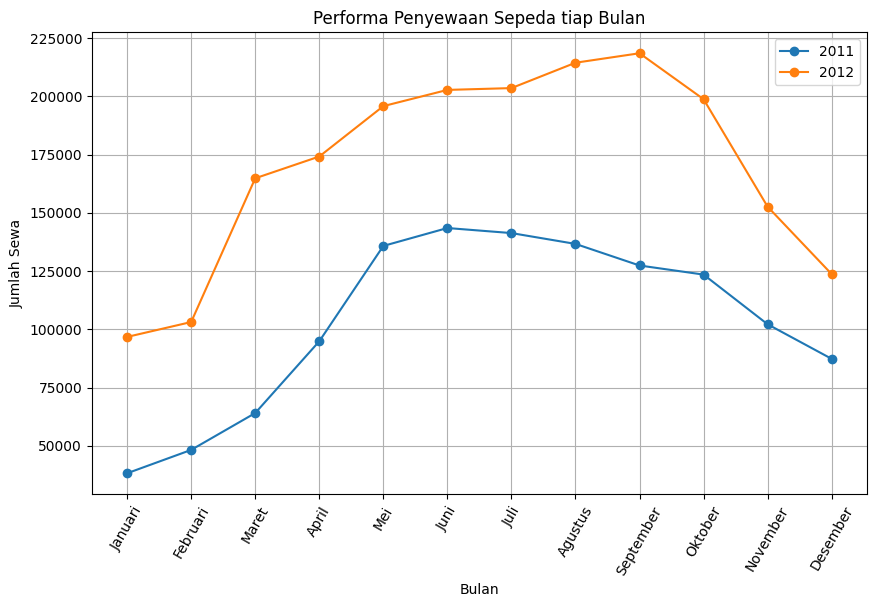

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(pertanyaan_1.index, pertanyaan_1[0], label='2011', marker='o')
plt.plot(pertanyaan_1.index, pertanyaan_1[1], label='2012', marker='o')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.title('Performa Penyewaan Sepeda tiap Bulan')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13), labels=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=60)
plt.show()

### Pertanyaan 2:

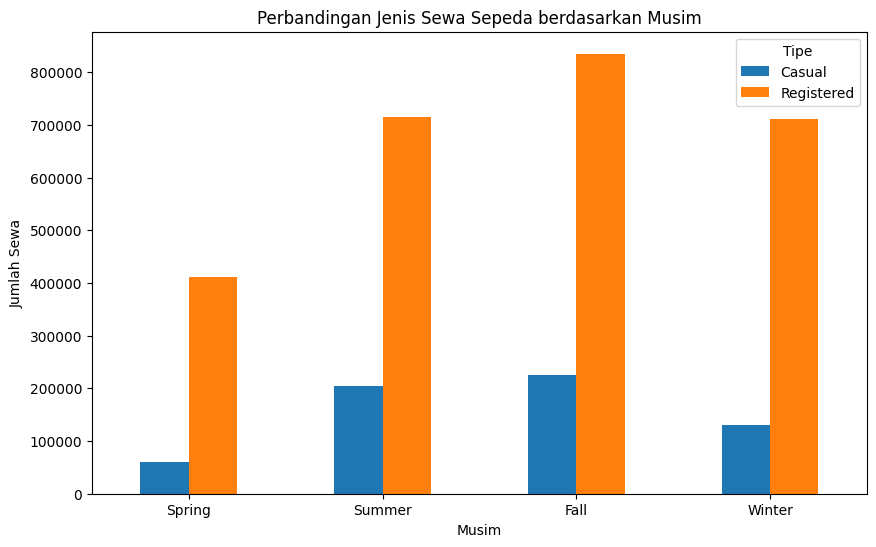

In [20]:
q2 = pertanyaan_2.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.title('Perbandingan Jenis Sewa Sepeda berdasarkan Musim')
plt.legend(title='Tipe', labels=['Casual', 'Registered'])
plt.xticks(rotation=0)
q2.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Di setiap bulan, performa penyewaan sepeda di tahun 2012 jauh lebih tinggi dibandingkan dengan 2011. Ini menandakan usaha yang dirintis berhasil berkembang dengan baik.
- Conclution pertanyaan 2: Di setiap musim, jumlah penyewa sepeda bertipe Registered selalu jauh lebih tinggi dibandingkan dengan tipe Casual. Ini menandakan musim tidak terlalu berpengaruh pada tipe penyewaan sepeda.

In [22]:
day_df.to_csv("day_df.csv", index=False)

In [23]:
hour_df.to_csv("hour_df.csv")